In [1]:
%pylab inline
for i in range (1,11):
    print i,"Hallo Fabrizio"
    

Populating the interactive namespace from numpy and matplotlib
1 Hallo Fabrizio
2 Hallo Fabrizio
3 Hallo Fabrizio
4 Hallo Fabrizio
5 Hallo Fabrizio
6 Hallo Fabrizio
7 Hallo Fabrizio
8 Hallo Fabrizio
9 Hallo Fabrizio
10 Hallo Fabrizio


In [2]:
for i in range (1,11):
    if i<>3:
        print i,i**2,i**3

1 1 1
2 4 8
4 16 64
5 25 125
6 36 216
7 49 343
8 64 512
9 81 729
10 100 1000


/usr/local/lib/python2.7/dist-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


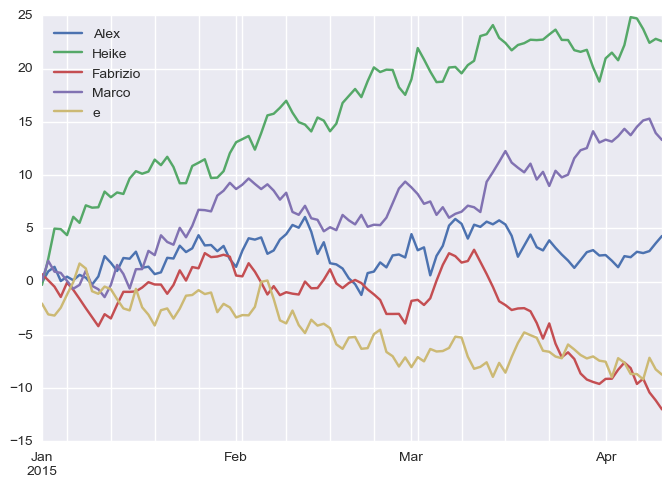

In [3]:
%matplotlib inline
#%notebook inline


import pandas as pd
import numpy as np
import matplotlib

from matplotlib import pyplot as plt
import seaborn as sns

ts = pd.Series(np.random.randn(100), index=pd.date_range('1/1/2015', periods=100))
ts = ts.cumsum()

df = pd.DataFrame(np.random.randn(100, 5), index=ts.index,
                  columns=['Alex', 'Heike', 'Fabrizio', 'Marco', 'e'])
df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')



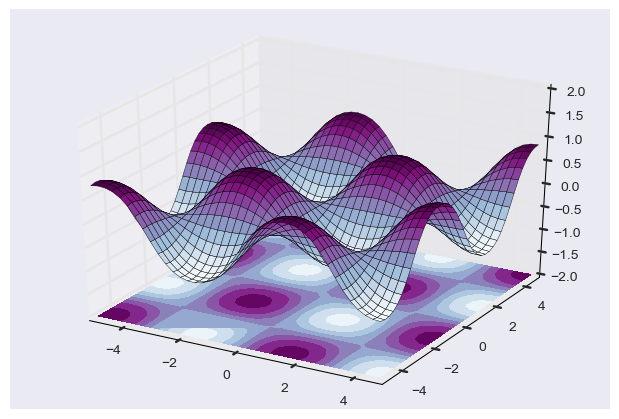

In [4]:
#%matplotlib qt
%matplotlib inline

from pylab import *
from mpl_toolkits.mplot3d import Axes3D

fig = figure()
ax = Axes3D(fig)
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sin(X)*np.sin(Y)
Z = np.sin(R)

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.BuPu)
ax.contourf(X, Y, Z, zdir="z", offset=-2, cmap=cm.BuPu)
ax.set_zlim(-2,2)

show()

In [5]:
import random
print random.randint(1,10)

3


In [6]:
def f(seq):
    seq.append(seq[-1] + n)
    

seq = [1]
for n in range(1,16):
    f(seq)
    
    
print (seq)


[1, 2, 4, 7, 11, 16, 22, 29, 37, 46, 56, 67, 79, 92, 106, 121]


In [7]:
def factorial(n):
    if n == 1:
        return 1
    return n * factorial(n-1)

factorial(5)

120

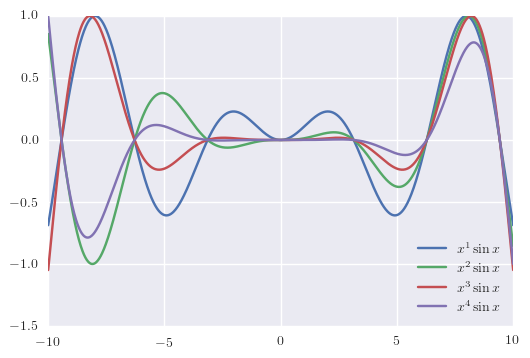

In [8]:
import pylab
pylab.rc('text', usetex=True)

x = pylab.linspace(-10,10,1001)
for n in range (1,5):
    y = x**n * pylab.sin(x)
    y /= max(y)
    pylab.plot(x,y, label=r'$x^{}\sin x$'.format(n))
pylab.legend(loc='lower right')
pylab.show()

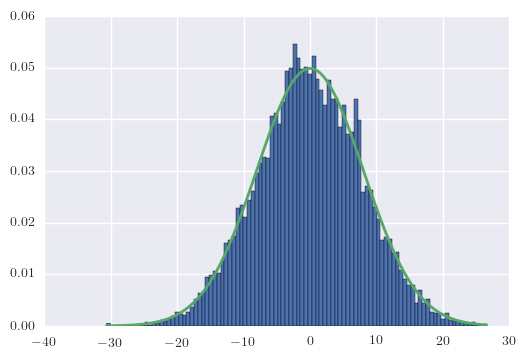

In [9]:
import pylab

mu, sigma = 0., 8.

samples = np.random.normal (loc=mu, scale=sigma, size=10000)

counts, bins, patches = pylab.hist(samples, bins=100, normed=True)

pylab.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( -(bins -mu)**2 / (2* sigma**2) ), lw=2)
pylab.show()



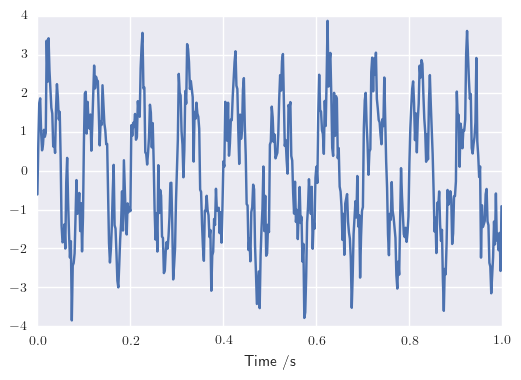

In [10]:
# f(t) = 2 sin(20 pi t) + sin (100 pi t) #273

A1, A2 = 2, 1
freq1, freq2 = 10, 50
fsamp = 500
t = np.arange(0, 1, 1./fsamp)
n = len (t)
f = A1*np.sin(2*np.pi*freq1*t) + A2*np.sin(2*np.pi*freq2*t)
f += 0.50 * np.random.randn(n)
pylab.plot(t, f)
pylab.xlabel('Time /s')
pylab.show()

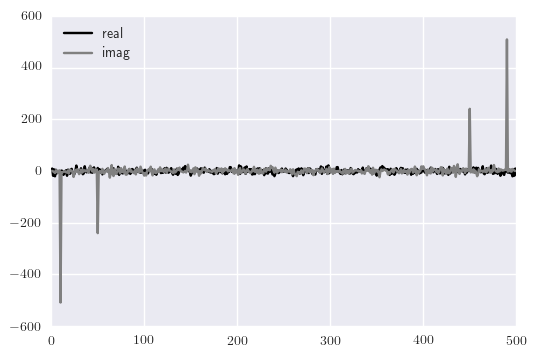

In [11]:
F = np.fft.fft(f)
pylab.plot(F.real, 'k', label='real')
pylab.plot(F.imag, 'gray', label='imag')
pylab.legend(loc=2)
pylab.show()

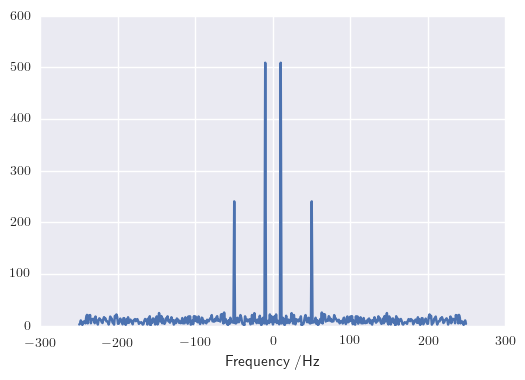

In [12]:
freq = np.fft.fftfreq(n, 1./fsamp)
F_shifted = np.fft.fftshift(F)
freq_shifted = np.fft.fftshift(freq)
pylab.plot(freq_shifted, np.abs(F_shifted))
pylab.xlabel('Frequency /Hz')
pylab.show()

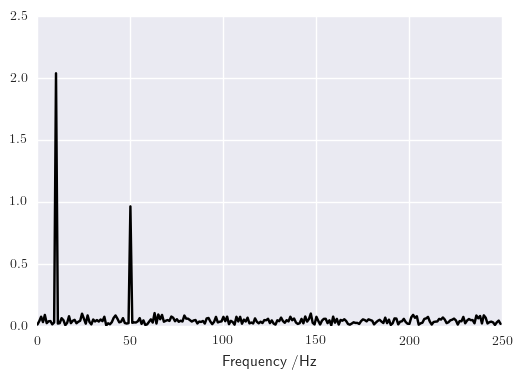

In [13]:
spec = 2./n * np.abs(F[:n/2])
pylab.plot(freq[:n/2], spec, 'k')
pylab.xlabel('Frequency /Hz')
pylab.show()

In [14]:
def fib(n):
    """
    Return a list of the first n numbers
    """

    f0, f1 = 0, 1
    f = [1] * n
    for i in range(1, n):
        f[i] = f0 + f1
        f0, f1 = f1, f[i]
    
    return f


print(fib(10))

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55]


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import sympy 


def plot_direction_field(x, y_x, f_xy, x_lim=(-5, 5), y_lim=(-5, 5), ax=None):
    f_np = sympy.lambdify((x, y_x), f_xy, 'numpy')
    x_vec = np.linspace(x_lim[0], x_lim[1], 20)
    y_vec = np.linspace(y_lim[0], y_lim[1], 20)
    
    if ax is None:
        _, ax = plt.subplots(figsize=(4, 4))
        
    dx = x_vec[1] - x_vec[0]
    dy = y_vec[1] - y_vec[0]
    
    for m, xx in enumerate(x_vec):
        for n, yy in enumerate(y_vec):
            Dy = f_np(xx, yy) * dy
            Dx = 0.8 * dx**2 / np.sqrt(dx**2 + Dy**2)
            Dy = 0.8 * Dy*dy / np.sqrt(dx**2 + Dy**2)
            ax.plot([xx - Dx/2, xx + Dx/2],
                    [yy - Dy/2, yy + Dy/2], 'b', lw=0.5)
    ax.axis('tight')
    ax.set_title(r"$%s$" %
                 (sympy.latex(sympy.Eq(y(x).diff(x), f_xy))),
                 fontsize=18)
    return ax

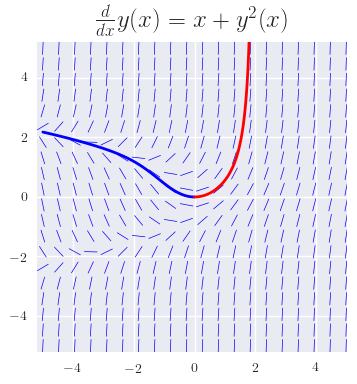

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import sympy 

sympy.init_printing()

x = sympy.symbols("x")
y = sympy.Function("y")
f = y(x)**2 + x

f_np = sympy.lambdify((y(x), x), f)


y0 = 0
xp = np.linspace(0, 1.9, 100)
yp = integrate.odeint(f_np, y0, xp)
xm = np.linspace(0, -5, 100)
ym = integrate.odeint(f_np, y0, xm)

fig, ax = plt.subplots(1, 1, figsize=(4, 4))
plot_direction_field(x, y(x), f, ax=ax)
ax.plot(xm, ym, 'b', lw=2)
ax.plot(xp, yp, 'r', lw=2)


In [17]:
def f(xyz, t, sigma, rho, beta):
    x, y, z, = xyz
    return [sigma * (y -x),
            x * (rho -z) - y,
            x * y - beta * z]


sigma, rho, beta = 8, 28, 8/3.0
t = np.linspace(0, 25, 10000)
xyz0 = [1.0, 1.0, 1.0]


xyz1 = integrate.odeint(f, xyz0, t, args=(sigma, rho, beta))
xyz2 = integrate.odeint(f, xyz0, t, args=(sigma, rho, 0.6*beta))
xyz3 = integrate.odeint(f, xyz0, t, args=(2*sigma, rho, 0.6*beta))

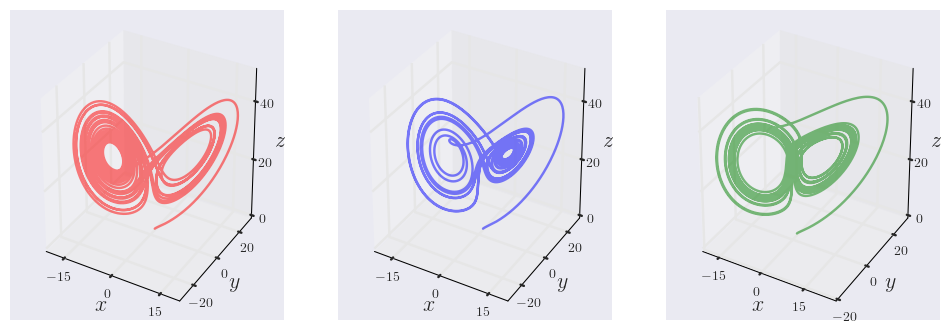

In [18]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(12, 4),
                                  subplot_kw={'projection':'3d'})
for ax, xyz, c in [(ax1, xyz1, 'r'), (ax2, xyz2, 'b'), (ax3, xyz3, 'g')]:
    ax.plot(xyz[:,0], xyz[:,1], xyz[:,2], c, alpha=0.5)
    ax.set_xlabel('$x$', fontsize=16)
    ax.set_ylabel('$y$', fontsize=16)
    ax.set_zlabel('$z$', fontsize=16)
    ax.set_xticks([-15, 0, 15])
    ax.set_yticks([-20, 0, 20])
    ax.set_zticks([0, 20, 40])

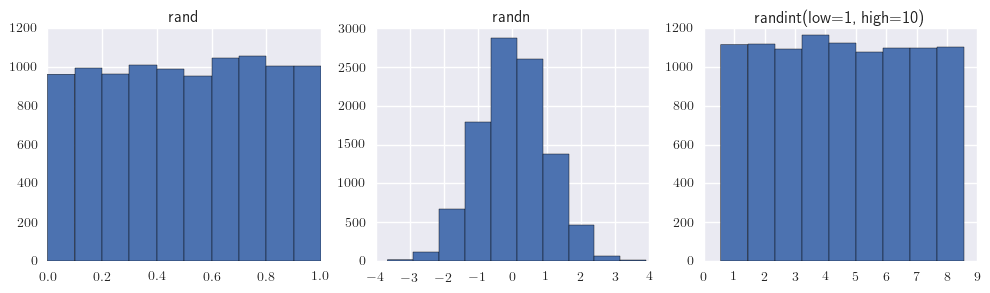

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))
axes[0].hist(np.random.rand(10000))
axes[0].set_title("rand")
axes[1].hist(np.random.randn(10000))
axes[1].set_title("randn")
axes[2].hist(np.random.randint(low=1, high=10, size=10000), bins=9, align='left')
axes[2].set_title("randint(low=1, high=10)")


In [20]:
from scipy import stats

X = stats.norm(1, 0.5)
X.rvs(10)

array([ 0.51575247,  0.55644862,  0.80032293,  1.4470844 ,  1.3069945 ,
        1.29818478,  0.6395599 ,  1.701121  ,  1.51009124,  0.40261897])

In [21]:
def plot_dist_samples(X, X_samples, title=None, ax=None):
    """ Plot the PDF an histogram of samples of a continous random variable"""
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(8,4))
        
    x_lim = X.interval(.99)
    x = np.linspace(*x_lim, num=100)
    
    ax.plot(x, X.pdf(x), label="PDF", lw=3)
    ax.hist(X_samples, label="samples", normed=1, bins=75)
    ax.set_xlim(*x_lim)
    ax.legend()
    
    if title:
        ax.set_title(title)
    return ax


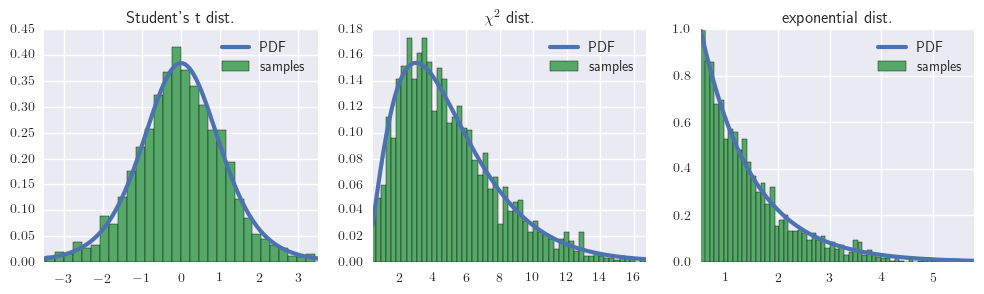

In [22]:
sfig, axes = plt.subplots(1, 3, figsize=(12, 3))
N = 2000
# Student's t distribution
X = stats.t(7.0)
plot_dist_samples(X, X.rvs(N), "Student's t dist.", ax=axes[0])

# The chisquared distribution
X = stats.chi2(5.0)
plot_dist_samples(X, X.rvs(N), r"$\chi^2$ dist.", ax=axes[1])

# The exponential distribution
X = stats.expon(0.5)
plot_dist_samples(X, X.rvs(N), "exponential dist.", ax=axes[2])


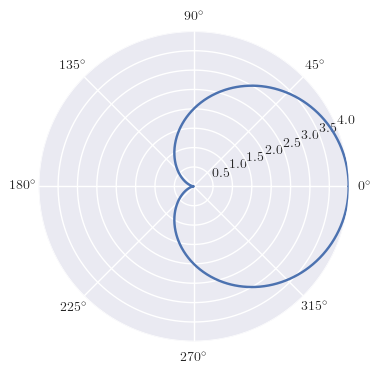

In [23]:
%matplotlib inline
import pylab

theta = pylab.linspace(0, 2.*pylab.pi, 1000)
a = 1.
r = 2 * a * (1. +  pylab.cos(theta))

#pylab.plot(theta, r)
#pylab.polar(theta+pylab.pi/4, r)
pylab.polar(theta, r)

#pylab.savefig('polar.pdf')
#pylab.savefig('polar.png')
pylab.show()

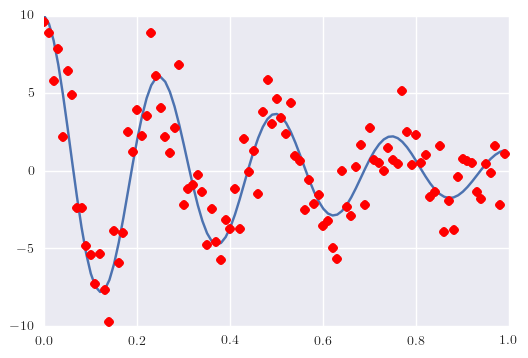

In [24]:
import numpy as np
import pylab

A, freq, tau = 10, 4 ,0.5
def f(t, A, freq, tau):
    return A * np.exp(-t/tau) * np.cos(2*np.pi * freq *t)

tmax, dt = 1, 0.01
t = np.arange(0, tmax, dt)
yexact = f(t, A, freq, tau)
y = yexact + np.random.randn(len(yexact))*2
pylab.plot(t, yexact)
pylab.plot(t, y, "ro")
pylab.show()


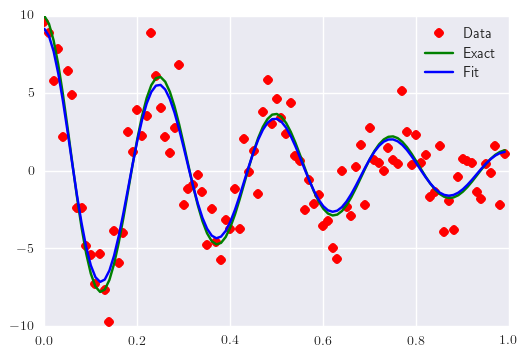

In [25]:
def residuals(p, y, t):
    A, freq, tau = p
    return y - f(t, A, freq, tau)

from scipy.optimize import leastsq
p0 = 5, 5, 1
plsq = leastsq(residuals, p0, args=(y, t))
pfit=plsq[0]

pylab.plot(t, y, 'o',  c='r', label='Data')
pylab.plot(t, yexact, c='g', label='Exact')
pylab.plot(t, f(t, *pfit), c='b', label='Fit')
pylab.legend()
pylab.show()

In [26]:
help (pylab.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, **kwargs)
    Plot lines and/or markers to the
    :class:`~matplotlib.axes.Axes`.  *args* is a variable length
    argument, allowing for multiple *x*, *y* pairs with an
    optional format string.  For example, each of the following is
    legal::
    
        plot(x, y)        # plot x and y using default line style and color
        plot(x, y, 'bo')  # plot x and y using blue circle markers
        plot(y)           # plot y using x as index array 0..N-1
        plot(y, 'r+')     # ditto, but with red plusses
    
    If *x* and/or *y* is 2-dimensional, then the corresponding columns
    will be plotted.
    
    An arbitrary number of *x*, *y*, *fmt* groups can be
    specified, as in::
    
        a.plot(x1, y1, 'g^', x2, y2, 'g-')
    
    Return value is a list of lines that were added.
    
    By default, each line is assigned a different color specified by a
    'color cycle'.  To change this behavior, you can 

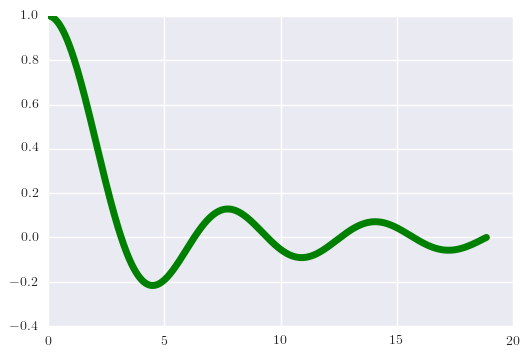

In [27]:
%matplotlib inline
import pylab

theta = pylab.linspace(0.1, 6.*pylab.pi, 1000)
a = 2.
#r = 2* a * (0.9 +  pylab.cos(theta+pylab.pi/2))
#r = pylab.cos(theta+pylab.pi/4) * pylab.sin(theta+pylab.pi/4)
r = pylab.sin(theta)/theta

#pylab.plot(theta, r)
#pylab.polar(theta+pylab.pi/4, r)
pylab.plot(theta, r, 'g', lw=5)
#pylab.polar(theta, r, 'b')
#pylab.savefig('polar.pdf')
#pylab.savefig('polar.png')
pylab.show()

In [28]:
#pylab.polar?

In [29]:
from __future__ import print_function
f = open('powers.txt', 'w')

for i in range(1,1001):
    print (i, i**2, i**3, i**4, sep=' ,', file=f)

f.close()

In [30]:
import numpy as np
#np.loadtxt('powers.txt', dtype='f',comments='#', delimiter=',', skiprows=1, usecols=(0,1,3))
np.loadtxt('powers.txt', dtype='u8',comments='#', delimiter=',', skiprows=1, usecols=(0,1,3))


array([[            2,             4,            16],
       [            3,             9,            81],
       [            4,            16,           256],
       ..., 
       [          998,        996004,  992023968016],
       [          999,        998001,  996005996001],
       [         1000,       1000000, 1000000000000]], dtype=uint64)

In [31]:
f = open('powers.txt', 'r')
squares, cubes, fourths = [], [], []

for line in f.readlines():
    fields = line.split(',')
    squares.append(int(fields[1]))
    cubes.append(int(fields[2]))
    fourths.append(int(fields[3]))
f.close()

n = 500
print(n, 'cubed is', cubes[n-1])

500 cubed is 125000000


In [32]:
%%bash

git status


On branch master
Your branch is up-to-date with 'origin/master'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   Test_First_Try.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	Humor-Sans.ttf

no changes added to commit (use "git add" and/or "git commit -a")


In [33]:
#%qtconsole


In [34]:
"""
XKCD plot generator
-------------------
Author: Jake Vanderplas

This is a script that will take any matplotlib line diagram, and convert it
to an XKCD-style plot.  It will work for plots with line & text elements,
including axes labels and titles (but not axes tick labels).

The idea for this comes from work by Damon McDougall
  http://www.mail-archive.com/matplotlib-users@lists.sourceforge.net/msg25499.html
"""
import numpy as np
import pylab as pl
from scipy import interpolate, signal
import matplotlib.font_manager as fm


# We need a special font for the code below.  It can be downloaded this way:
import os
import urllib2
if not os.path.exists('Humor-Sans.ttf'):
    fhandle = urllib2.urlopen('http://antiyawn.com/uploads/Humor-Sans-1.0.ttf')
    open('Humor-Sans.ttf', 'wb').write(fhandle.read())

    
def xkcd_line(x, y, xlim=None, ylim=None,
              mag=1.0, f1=30, f2=0.05, f3=15):
    """
    Mimic a hand-drawn line from (x, y) data

    Parameters
    ----------
    x, y : array_like
        arrays to be modified
    xlim, ylim : data range
        the assumed plot range for the modification.  If not specified,
        they will be guessed from the  data
    mag : float
        magnitude of distortions
    f1, f2, f3 : int, float, int
        filtering parameters.  f1 gives the size of the window, f2 gives
        the high-frequency cutoff, f3 gives the size of the filter
    
    Returns
    -------
    x, y : ndarrays
        The modified lines
    """
    x = np.asarray(x)
    y = np.asarray(y)
    
    # get limits for rescaling
    if xlim is None:
        xlim = (x.min(), x.max())
    if ylim is None:
        ylim = (y.min(), y.max())

    if xlim[1] == xlim[0]:
        xlim = ylim
        
    if ylim[1] == ylim[0]:
        ylim = xlim

    # scale the data
    x_scaled = (x - xlim[0]) * 1. / (xlim[1] - xlim[0])
    y_scaled = (y - ylim[0]) * 1. / (ylim[1] - ylim[0])

    # compute the total distance along the path
    dx = x_scaled[1:] - x_scaled[:-1]
    dy = y_scaled[1:] - y_scaled[:-1]
    dist_tot = np.sum(np.sqrt(dx * dx + dy * dy))

    # number of interpolated points is proportional to the distance
    Nu = int(200 * dist_tot)
    u = np.arange(-1, Nu + 1) * 1. / (Nu - 1)

    # interpolate curve at sampled points
    k = min(3, len(x) - 1)
    res = interpolate.splprep([x_scaled, y_scaled], s=0, k=k)
    x_int, y_int = interpolate.splev(u, res[0]) 

    # we'll perturb perpendicular to the drawn line
    dx = x_int[2:] - x_int[:-2]
    dy = y_int[2:] - y_int[:-2]
    dist = np.sqrt(dx * dx + dy * dy)

    # create a filtered perturbation
    coeffs = mag * np.random.normal(0, 0.01, len(x_int) - 2)
    b = signal.firwin(f1, f2 * dist_tot, window=('kaiser', f3))
    response = signal.lfilter(b, 1, coeffs)

    x_int[1:-1] += response * dy / dist
    y_int[1:-1] += response * dx / dist

    # un-scale data
    x_int = x_int[1:-1] * (xlim[1] - xlim[0]) + xlim[0]
    y_int = y_int[1:-1] * (ylim[1] - ylim[0]) + ylim[0]
    
    return x_int, y_int


def XKCDify(ax, mag=1.0,
            f1=50, f2=0.01, f3=15,
            bgcolor='w',
            xaxis_loc=None,
            yaxis_loc=None,
            xaxis_arrow='+',
            yaxis_arrow='+',
            ax_extend=0.1,
            expand_axes=False):
    """Make axis look hand-drawn

    This adjusts all lines, text, legends, and axes in the figure to look
    like xkcd plots.  Other plot elements are not modified.
    
    Parameters
    ----------
    ax : Axes instance
        the axes to be modified.
    mag : float
        the magnitude of the distortion
    f1, f2, f3 : int, float, int
        filtering parameters.  f1 gives the size of the window, f2 gives
        the high-frequency cutoff, f3 gives the size of the filter
    xaxis_loc, yaxis_log : float
        The locations to draw the x and y axes.  If not specified, they
        will be drawn from the bottom left of the plot
    xaxis_arrow, yaxis_arrow : str
        where to draw arrows on the x/y axes.  Options are '+', '-', '+-', or ''
    ax_extend : float
        How far (fractionally) to extend the drawn axes beyond the original
        axes limits
    expand_axes : bool
        if True, then expand axes to fill the figure (useful if there is only
        a single axes in the figure)
    """
    # Get axes aspect
    ext = ax.get_window_extent().extents
    aspect = (ext[3] - ext[1]) / (ext[2] - ext[0])

    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xspan = xlim[1] - xlim[0]
    yspan = ylim[1] - xlim[0]

    xax_lim = (xlim[0] - ax_extend * xspan,
               xlim[1] + ax_extend * xspan)
    yax_lim = (ylim[0] - ax_extend * yspan,
               ylim[1] + ax_extend * yspan)

    if xaxis_loc is None:
        xaxis_loc = ylim[0]

    if yaxis_loc is None:
        yaxis_loc = xlim[0]

    # Draw axes
    xaxis = pl.Line2D([xax_lim[0], xax_lim[1]], [xaxis_loc, xaxis_loc],
                      linestyle='-', color='k')
    yaxis = pl.Line2D([yaxis_loc, yaxis_loc], [yax_lim[0], yax_lim[1]],
                      linestyle='-', color='k')

    # Label axes3, 0.5, 'hello', fontsize=14)
    ax.text(xax_lim[1], xaxis_loc - 0.02 * yspan, ax.get_xlabel(),
            fontsize=14, ha='right', va='top', rotation=12)
    ax.text(yaxis_loc - 0.02 * xspan, yax_lim[1], ax.get_ylabel(),
            fontsize=14, ha='right', va='top', rotation=78)
    ax.set_xlabel('')
    ax.set_ylabel('')

    # Add title
    ax.text(0.5 * (xax_lim[1] + xax_lim[0]), yax_lim[1],
            ax.get_title(),
            ha='center', va='bottom', fontsize=16)
    ax.set_title('')

    Nlines = len(ax.lines)
    lines = [xaxis, yaxis] + [ax.lines.pop(0) for i in range(Nlines)]

    for line in lines:
        x, y = line.get_data()

        x_int, y_int = xkcd_line(x, y, xlim, ylim,
                                 mag, f1, f2, f3)

        # create foreground and background line
        lw = line.get_linewidth()
        line.set_linewidth(2 * lw)
        line.set_data(x_int, y_int)

        # don't add background line for axes
        if (line is not xaxis) and (line is not yaxis):
            line_bg = pl.Line2D(x_int, y_int, color=bgcolor,
                                linewidth=8 * lw)

            ax.add_line(line_bg)
        ax.add_line(line)

    # Draw arrow-heads at the end of axes lines
    arr1 = 0.03 * np.array([-1, 0, -1])
    arr2 = 0.02 * np.array([-1, 0, 1])

    arr1[::2] += np.random.normal(0, 0.005, 2)
    arr2[::2] += np.random.normal(0, 0.005, 2)

    x, y = xaxis.get_data()
    if '+' in str(xaxis_arrow):
        ax.plot(x[-1] + arr1 * xspan * aspect,
                y[-1] + arr2 * yspan,
                color='k', lw=2)
    if '-' in str(xaxis_arrow):
        ax.plot(x[0] - arr1 * xspan * aspect,
                y[0] - arr2 * yspan,
                color='k', lw=2)

    x, y = yaxis.get_data()
    if '+' in str(yaxis_arrow):
        ax.plot(x[-1] + arr2 * xspan * aspect,
                y[-1] + arr1 * yspan,
                color='k', lw=2)
    if '-' in str(yaxis_arrow):
        ax.plot(x[0] - arr2 * xspan * aspect,
                y[0] - arr1 * yspan,
                color='k', lw=2)

    # Change all the fonts to humor-sans.
    prop = fm.FontProperties(fname='Humor-Sans.ttf', size=16)
    for text in ax.texts:
        text.set_fontproperties(prop)
    
    # modify legend
    leg = ax.get_legend()
    if leg is not None:
        leg.set_frame_on(False)
        
        for child in leg.get_children():
            if isinstance(child, pl.Line2D):
                x, y = child.get_data()
                child.set_data(xkcd_line(x, y, mag=10, f1=100, f2=0.001))
                child.set_linewidth(2 * child.get_linewidth())
            if isinstance(child, pl.Text):
                child.set_fontproperties(prop)
    
    # Set the axis limits
    ax.set_xlim(xax_lim[0] - 0.1 * xspan,
                xax_lim[1] + 0.1 * xspan)
    ax.set_ylim(yax_lim[0] - 0.1 * yspan,
                yax_lim[1] + 0.1 * yspan)

    # adjust the axes
    ax.set_xticks([])
    ax.set_yticks([])      

    if expand_axes:
        ax.figure.set_facecolor(bgcolor)
        ax.set_axis_off()
        ax.set_position([0, 0, 1, 1])
    
    return ax

In [35]:
#%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['axes', 'f', 'linalg', 'beta', 'pylab', 'random', 'power', 'info', 'fft']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


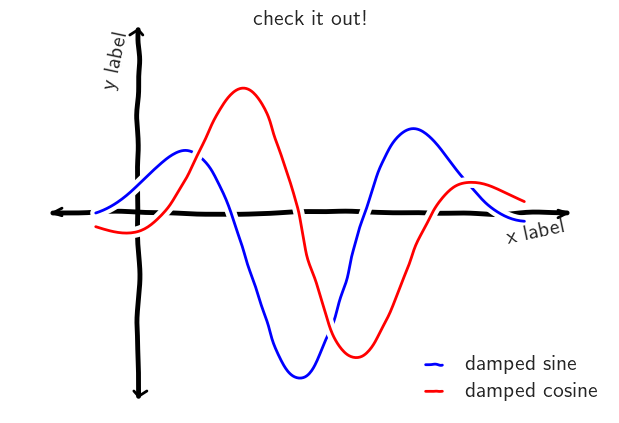

In [36]:
np.random.seed(0)

ax = pylab.axes()

x = np.linspace(0, 10, 100)
ax.plot(x, np.sin(x) * np.exp(-0.1 * (x - 5) ** 2), 'b', lw=1, label='damped sine')
ax.plot(x, -np.cos(x) * np.exp(-0.1 * (x - 5) ** 2), 'r', lw=1, label='damped cosine')

ax.set_title('check it out!')
ax.set_xlabel('x label')
ax.set_ylabel('y label')

ax.legend(loc='lower right')

ax.set_xlim(0, 10)
ax.set_ylim(-1.0, 1.0)

#XKCDify the axes -- this operates in-place
XKCDify(ax, xaxis_loc=0.0, yaxis_loc=1.0,
        xaxis_arrow='+-', yaxis_arrow='+-',
        expand_axes=True)


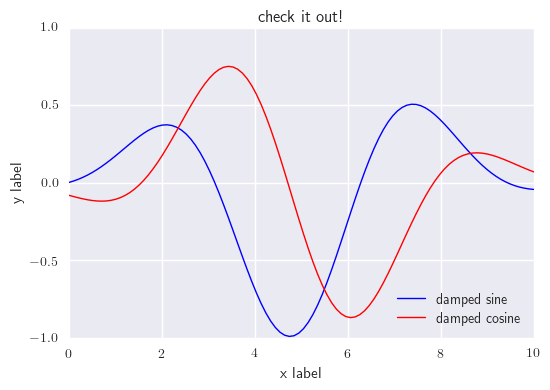

In [37]:
np.random.seed(0)

ax = pylab.axes()

x = np.linspace(0, 10, 100)
ax.plot(x, np.sin(x) * np.exp(-0.1 * (x - 5) ** 2), 'b', lw=1, label='damped sine')
ax.plot(x, -np.cos(x) * np.exp(-0.1 * (x - 5) ** 2), 'r', lw=1, label='damped cosine')

ax.set_title('check it out!')
ax.set_xlabel('x label')
ax.set_ylabel('y label')

ax.legend(loc='lower right')

ax.set_xlim(0, 10)
ax.set_ylim(-1.0, 1.0)




In [38]:
#from turtle import *
#
#color('red', 'yellow')
#begin_fill()
#while True:
#    forward(200)
#    left(170)
#    if abs(pos()) < 1:
#            break
#    end_fill()
#done()

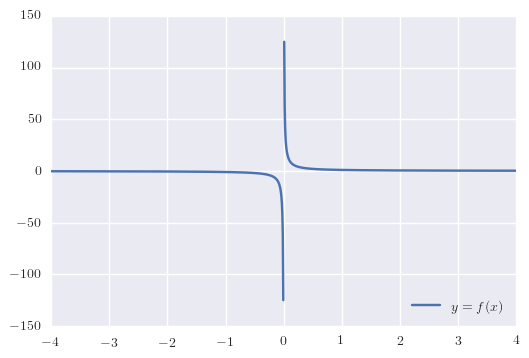

In [39]:
import pylab
import math
pylab.rc('text', usetex=True)

x = pylab.linspace(-4,4,1001)

#y = pylab.exp(x)
#y = pylab.log2(x)
#y = pylab.absolute(x)**pylab.sin(x)
#y = pylab.cosh(x)
y = (1/x)
#y /= max(y)
pylab.plot(x,y, label=r'$y=f(x)^{}$')
pylab.legend(loc='lower right')
pylab.show()

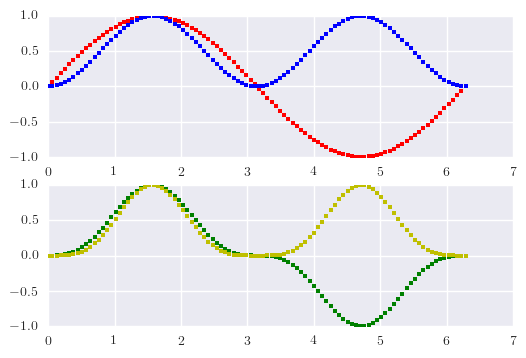

In [40]:
import pylab

xab = pylab.linspace(0, 2.*pylab.pi, 100)

pylab.subplot(2,1,1)
pylab.plot(xab, pylab.sin(xab), 'r.', xab, pylab.sin(xab)**2, 'b.')

pylab.subplot(2,1,2)
pylab.plot(xab, pylab.sin(xab)**3, 'g.', xab, pylab.sin(xab)**4, 'y.')


<matplotlib.colorbar.Colorbar instance at 0x7f49bd28dd88>

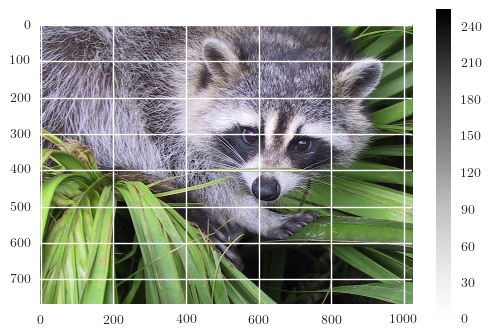

In [41]:
from scipy.misc import face
img = face()

imshow(img)

colorbar()

<matplotlib.colorbar.Colorbar instance at 0x7f49bcf5b5a8>

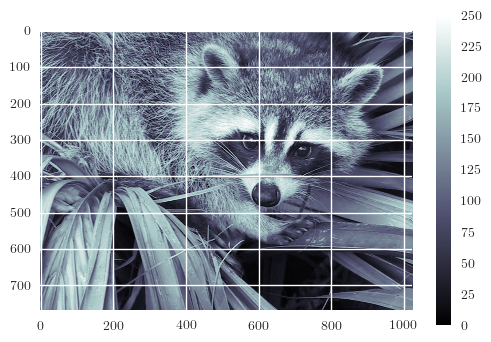

In [42]:
imgbw=face(True)
imshow(imgbw, cmap=cm.bone)
colorbar()

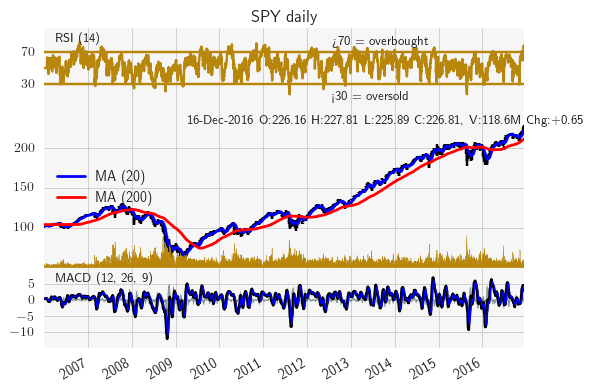

In [43]:

import datetime
import numpy as np
import matplotlib.colors as colors
import matplotlib.finance as finance
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager


startdate = datetime.date(2006, 1, 1)
today = enddate = datetime.date.today()
ticker = 'SPY'


fh = finance.fetch_historical_yahoo(ticker, startdate, enddate)
# a numpy record array with fields: date, open, high, low, close, volume, adj_close)

r = mlab.csv2rec(fh)
fh.close()
r.sort()


def moving_average(x, n, type='simple'):
    """
    compute an n period moving average.

    type is 'simple' | 'exponential'

    """
    x = np.asarray(x)
    if type == 'simple':
        weights = np.ones(n)
    else:
        weights = np.exp(np.linspace(-1., 0., n))

    weights /= weights.sum()

    a = np.convolve(x, weights, mode='full')[:len(x)]
    a[:n] = a[n]
    return a


def relative_strength(prices, n=14):
    """
    compute the n period relative strength indicator
    http://stockcharts.com/school/doku.php?id=chart_school:glossary_r#relativestrengthindex
    http://www.investopedia.com/terms/r/rsi.asp
    """

    deltas = np.diff(prices)
    seed = deltas[:n+1]
    up = seed[seed >= 0].sum()/n
    down = -seed[seed < 0].sum()/n
    rs = up/down
    rsi = np.zeros_like(prices)
    rsi[:n] = 100. - 100./(1. + rs)

    for i in range(n, len(prices)):
        delta = deltas[i - 1]  # cause the diff is 1 shorter

        if delta > 0:
            upval = delta
            downval = 0.
        else:
            upval = 0.
            downval = -delta

        up = (up*(n - 1) + upval)/n
        down = (down*(n - 1) + downval)/n

        rs = up/down
        rsi[i] = 100. - 100./(1. + rs)

    return rsi


def moving_average_convergence(x, nslow=26, nfast=12):
    """
    compute the MACD (Moving Average Convergence/Divergence) using a fast and slow exponential moving avg'
    return value is emaslow, emafast, macd which are len(x) arrays
    """
    emaslow = moving_average(x, nslow, type='exponential')
    emafast = moving_average(x, nfast, type='exponential')
    return emaslow, emafast, emafast - emaslow


plt.rc('axes', grid=True)
plt.rc('grid', color='0.75', linestyle='-', linewidth=0.5)

textsize = 9
left, width = 0.1, 0.8
rect1 = [left, 0.7, width, 0.2]
rect2 = [left, 0.3, width, 0.4]
rect3 = [left, 0.1, width, 0.2]


fig = plt.figure(facecolor='white')
axescolor = '#f6f6f6'  # the axes background color

ax1 = fig.add_axes(rect1, axisbg=axescolor)  # left, bottom, width, height
ax2 = fig.add_axes(rect2, axisbg=axescolor, sharex=ax1)
ax2t = ax2.twinx()
ax3 = fig.add_axes(rect3, axisbg=axescolor, sharex=ax1)


# plot the relative strength indicator
prices = r.adj_close
rsi = relative_strength(prices)
fillcolor = 'darkgoldenrod'

ax1.plot(r.date, rsi, color=fillcolor)
ax1.axhline(70, color=fillcolor)
ax1.axhline(30, color=fillcolor)
ax1.fill_between(r.date, rsi, 70, where=(rsi >= 70), facecolor=fillcolor, edgecolor=fillcolor)
ax1.fill_between(r.date, rsi, 30, where=(rsi <= 30), facecolor=fillcolor, edgecolor=fillcolor)
ax1.text(0.6, 0.9, '>70 = overbought', va='top', transform=ax1.transAxes, fontsize=textsize)
ax1.text(0.6, 0.1, '<30 = oversold', transform=ax1.transAxes, fontsize=textsize)
ax1.set_ylim(0, 100)
ax1.set_yticks([30, 70])
ax1.text(0.025, 0.95, 'RSI (14)', va='top', transform=ax1.transAxes, fontsize=textsize)
ax1.set_title('%s daily' % ticker)

# plot the price and volume data
dx = r.adj_close - r.close
low = r.low + dx
high = r.high + dx

deltas = np.zeros_like(prices)
deltas[1:] = np.diff(prices)
up = deltas > 0
ax2.vlines(r.date[up], low[up], high[up], color='black', label='_nolegend_')
ax2.vlines(r.date[~up], low[~up], high[~up], color='black', label='_nolegend_')
ma20 = moving_average(prices, 20, type='simple')
ma200 = moving_average(prices, 200, type='simple')

linema20, = ax2.plot(r.date, ma20, color='blue', lw=2, label='MA (20)')
linema200, = ax2.plot(r.date, ma200, color='red', lw=2, label='MA (200)')


last = r[-1]
s = '%s O:%1.2f H:%1.2f L:%1.2f C:%1.2f, V:%1.1fM Chg:%+1.2f' % (
    today.strftime('%d-%b-%Y'),
    last.open, last.high,
    last.low, last.close,
    last.volume*1e-6,
    last.close - last.open)
t4 = ax2.text(0.3, 0.9, s, transform=ax2.transAxes, fontsize=textsize)

props = font_manager.FontProperties(size=10)
leg = ax2.legend(loc='center left', shadow=True, fancybox=True, prop=props)
leg.get_frame().set_alpha(0.5)


volume = (r.close*r.volume)/1e6  # dollar volume in millions
vmax = volume.max()
poly = ax2t.fill_between(r.date, volume, 0, label='Volume', facecolor=fillcolor, edgecolor=fillcolor)
ax2t.set_ylim(0, 5*vmax)
ax2t.set_yticks([])


# compute the MACD indicator
fillcolor = 'darkslategrey'
nslow = 26
nfast = 12
nema = 9
emaslow, emafast, macd = moving_average_convergence(prices, nslow=nslow, nfast=nfast)
ema9 = moving_average(macd, nema, type='exponential')
ax3.plot(r.date, macd, color='black', lw=2)
ax3.plot(r.date, ema9, color='blue', lw=1)
ax3.fill_between(r.date, macd - ema9, 0, alpha=0.5, facecolor=fillcolor, edgecolor=fillcolor)


ax3.text(0.025, 0.95, 'MACD (%d, %d, %d)' % (nfast, nslow, nema), va='top',
         transform=ax3.transAxes, fontsize=textsize)

#ax3.set_yticks([])
# turn off upper axis tick labels, rotate the lower ones, etc
for ax in ax1, ax2, ax2t, ax3:
    if ax != ax3:
        for label in ax.get_xticklabels():
            label.set_visible(False)
    else:
        for label in ax.get_xticklabels():
            label.set_rotation(30)
            label.set_horizontalalignment('right')

    ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')


class MyLocator(mticker.MaxNLocator):
    def __init__(self, *args, **kwargs):
        mticker.MaxNLocator.__init__(self, *args, **kwargs)

    def __call__(self, *args, **kwargs):
        return mticker.MaxNLocator.__call__(self, *args, **kwargs)

# at most 5 ticks, pruning the upper and lower so they don't overlap
# with other ticks
#ax2.yaxis.set_major_locator(mticker.MaxNLocator(5, prune='both'))
#ax3.yaxis.set_major_locator(mticker.MaxNLocator(5, prune='both'))

ax2.yaxis.set_major_locator(MyLocator(5, prune='both'))
ax3.yaxis.set_major_locator(MyLocator(5, prune='both'))

plt.show()

#Keywords: python, matplotlib, pylab, example, codex (see Search examples)
#© Copyright 2002 - 2012 John Hunter, Darren Dale, Eric Firing, Michael Droettboom and the matplotlib development team; 2012 - 2014 The matplotlib development team. Last updated on Dec 05, 2016. Created using Sphinx 1.4.3.


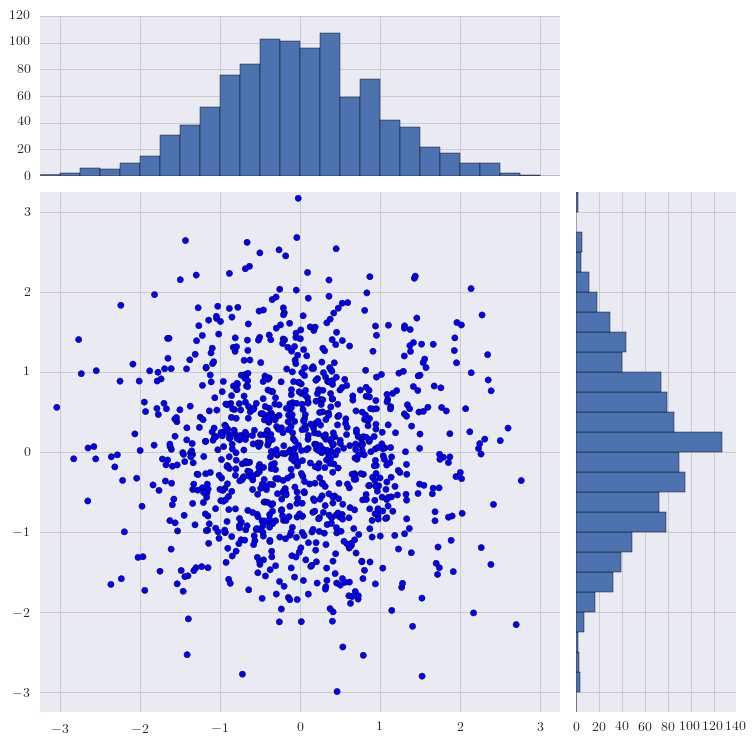

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter

# the random data
x = np.random.randn(1000)
y = np.random.randn(1000)

nullfmt = NullFormatter()         # no labels

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(1, figsize=(8, 8))

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

# no labels
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)

# the scatter plot:
axScatter.scatter(x, y)

# now determine nice limits by hand:
binwidth = 0.25
xymax = np.max([np.max(np.fabs(x)), np.max(np.fabs(y))])
lim = (int(xymax/binwidth) + 1) * binwidth

axScatter.set_xlim((-lim, lim))
axScatter.set_ylim((-lim, lim))

bins = np.arange(-lim, lim + binwidth, binwidth)
axHistx.hist(x, bins=bins)
axHisty.hist(y, bins=bins, orientation='horizontal')

axHistx.set_xlim(axScatter.get_xlim())
axHisty.set_ylim(axScatter.get_ylim())

plt.show()

#Keywords: python, matplotlib, pylab, example, codex (see Search examples)
#© Copyright 2002 - 2012 John Hunter, Darren Dale, Eric Firing, Michael Droettboom and the matplotlib development team; 2012 - 2014 The matplotlib development team. Last updated on Dec 05, 2016. Created using Sphinx 1.4.3.


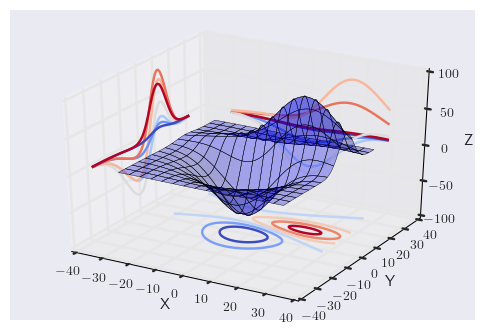

In [45]:

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

fig = plt.figure()
ax = fig.gca(projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)
ax.plot_surface(X, Y, Z, rstride=8, cstride=8, alpha=0.3)
cset = ax.contour(X, Y, Z, zdir='z', offset=-100, cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='x', offset=-40, cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='y', offset=40, cmap=cm.coolwarm)

ax.set_xlabel('X')
ax.set_xlim(-40, 40)
ax.set_ylabel('Y')
ax.set_ylim(-40, 40)
ax.set_zlabel('Z')
ax.set_zlim(-100, 100)

plt.show()

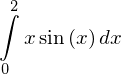

In [46]:
from sympy import Symbol, Integral, sin, init_printing

x = Symbol('x')
init_printing()
Integral(x*sin(x), (x, 0, 2))

In [47]:
Integral(x*sin(x), (x, 0, 2)).doit()

In [48]:
Integral(x*sin(x), (x, 0, 2)).doit().evalf()

In [49]:
from sympy import solve, Symbol
x=Symbol('x')
solve(x**2 + 2*x +1)

In [50]:
arange(5)

array([0, 1, 2, 3, 4])

In [51]:
arange(30).reshape(5,6)

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29]])

{'boxes': [<matplotlib.lines.Line2D at 0x7f49bc6d4550>,
 'caps': [<matplotlib.lines.Line2D at 0x7f49bc6c1d10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f49bc6d4d50>,
 'medians': [<matplotlib.lines.Line2D at 0x7f49bc6d4950>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f49bc6c1790>,
  <matplotlib.lines.Line2D at 0x7f49bc6a8910>]}

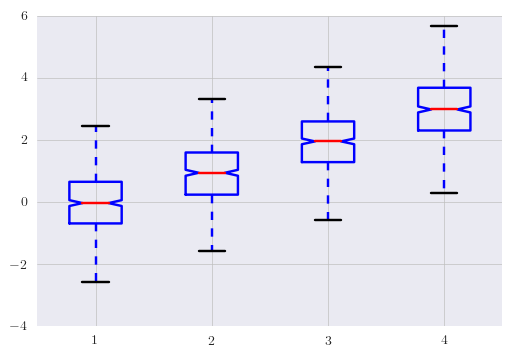

In [52]:
#%matplotlib qt
#%matplotlib inline
import numpy as np

from numpy.random import normal
ex = [normal(i, 1+1/2, size=(500,))
      for i in np.arange(4.)]

positions = np.arange(len(ex))+1
boxplot(ex, sym='k+', notch=True, positions=positions)

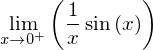

In [53]:
# Limits

from sympy import Symbol, Limit, sin, init_printing

x = Symbol('x')

init_printing()

Limit(sin(x)/x, x, 0)

In [54]:
Limit(sin(x)/x, x, 0).doit()

In [55]:
#
#import numpy as np
#import matplotlib.pyplot as plt
#
#plt.axis([0, 100, 0, 1])
#plt.ion()
#
#for i in range(100):
#    y = np.random.random()
#    plt.scatter(i, y)
#    plt.pause(0.05)
#
#while True:
#    plt.pause(0.05)